In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.cluster.vq import vq
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.io import imread_collection 
import random

1350


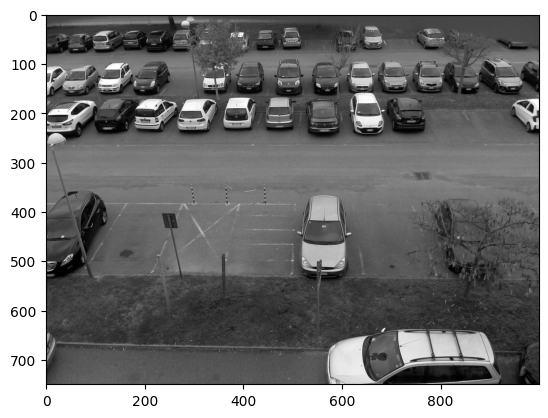

In [2]:
img_rgb = cv.imread(r"D:\CNR-EXT_FULL_IMAGE_1000x750\FULL_IMAGE_1000x750\OVERCAST\2015-11-20\camera6\2015-11-20_1347.jpg")
img = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

all_images = dict()
collection = []

weather = ["SUNNY", "OVERCAST", "RAINY"]
id_camera = range(1,10)

for w in weather:
    for id_cam in id_camera:
        imgs_path = "D:\CNR-EXT_FULL_IMAGE_1000x750\FULL_IMAGE_1000x750\%s\*\camera%d\*.jpg" % (w,id_cam)
        col = imread_collection(imgs_path)
        col = col[:50]
        collection.extend(col)
        for im,path in zip(col,col.files): 
            all_images.update({path: im})
            
print(len(all_images))
plt.imshow(img, cmap='gray')


In [3]:
#SLOTS 
slots = dict()
for id_cam in range(1,10):
    camera_path = "D:\CNR-EXT_FULL_IMAGE_1000x750\camera%d.csv" % (id_cam)
    df = pd.read_csv(camera_path, sep = ";")

    l = camera_path.split("\\")
    camera_num = l[2][6]

    for path in list(all_images.keys()):
        s = path.split("\\")
        camera_path_num = s[5][6]

        if camera_path_num == camera_num:
            img = all_images[path]
            slots[path] = []
            x = df['X'][0]
            for i in range(0, df.shape[0]):
                x = int((df['X'][i])/2.592)
                w = int((df['X'][i] + df['W'][i])/2.592)
                y = int((df['Y'][i])/2.592)
                h = int((df['Y'][i] + df['H'][i])/2.592)
                bbox = img[y:h, x:w] 
                bbox = cv.resize(bbox, (150, 150), interpolation=cv.INTER_LINEAR)
                slots[path].append(bbox)

In [ ]:
#ground_truth = 'D:\\Users\\elisa\\OneDrive\\Desktop\\Lab_CV\\progetto\\park\\CNR-EXT-Patches-150x150\\LABELS\\all.txt'
import collections

slo = dict()
ground_tr = dict()
with open('all.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        lines_split = line.split("/")
        weather = lines_split[0]
        date = lines_split[1]
        camera = lines_split[2]

        for path in list(all_images.keys()):
            s = path.split("\\")
            weather_path = s[3]
            date_path = s[4]
            camera_path = s[5]
            hp = s[6]
            h_p = hp.split(".")
            hour_path = h_p[0]
            hour_path = hour_path[-4:-2]+"."+hour_path[-2:]

            if weather_path == weather and date_path == date and camera_path == camera and hour_path in line:
                slot_id = line.split(".jpg")
                slot_id = slot_id[0][-3:]
                s = line.split(" ")
                bf = s[1]
                bf = bf.split("\n")
                bf = bf[0]
                
                slo[slot_id] = bf
            ground_truth = collections.OrderedDict(sorted(slo.items())).values()
            ground_tr[path] = ground_truth

In [ ]:
imagesB = []
imagesF = []
folder_busy = "C:\\Users\\elisa\\OneDrive\\Desktop\\Lab_CV\\progetto\\park\\CNRPark-Patches-150x150\\A\\busy"
files_images_B = []
files_images_F = []

for file in os.listdir(folder_busy):
    if file.lower().endswith('.jpg'):
        files_images_B.append(file)
        path_busy = os.path.join(folder_busy, file)
        img_B = cv.imread(path_busy)
        imagesB.append(img_B)

folder_free = "C:\\Users\\elisa\\OneDrive\\Desktop\\Lab_CV\\progetto\\park\\CNRPark-Patches-150x150\\A\\free"

for file in os.listdir(folder_free):
    if file.lower().endswith('.jpg'):
        files_images_F.append(file)
        path_free = os.path.join(folder_free, file)
        img_F = cv.imread(path_free)
        imagesF.append(img_F)

imagesBF = []

imagesBF = imagesB + imagesF

plt.imshow(imagesF[6], cmap='gray')

In [ ]:
# all images in grayscale
bw_imgs_B = []
bw_imgs_F = []

for img in imagesB:
    if len(img.shape) == 3:
        bw_imgs_B.append(cv.cvtColor(img, cv.COLOR_BGR2GRAY))

    else:
        bw_imgs_B.append(img)

for img in imagesF:
    if len(img.shape) == 3:
        bw_imgs_F.append(cv.cvtColor(img, cv.COLOR_BGR2GRAY))

    else:
        bw_imgs_F.append(img)

bw_imgs_BF = []

for img in imagesBF:
    if len(img.shape) == 3:
        bw_imgs_BF.append(cv.cvtColor(img, cv.COLOR_BGR2GRAY))

    else:
        bw_imgs_BF.append(img)

In [ ]:
# defining feature extractor (SIFT)
extractor = cv.xfeatures2d.SIFT_create()
keypoints_B = []
descriptors_B = []
keypoints_F = []
descriptors_F = []

for img in bw_imgs_B:
    img_keypoints_B, img_descriptors_B = extractor.detectAndCompute(img, None)
    keypoints_B.append(img_keypoints_B)
    if img_descriptors_B is not None:
        descriptors_B.append(img_descriptors_B)

for img in bw_imgs_F:
    img_keypoints_F, img_descriptors_F = extractor.detectAndCompute(img, None)
    keypoints_F.append(img_keypoints_F)
    if img_descriptors_F is not None:
        descriptors_F.append(img_descriptors_F)

descriptors_BF =[]
keypoints_BF = []
descriptors_BF = []

for img in imagesBF:
    img_keypoints_BF, img_descriptors_BF = extractor.detectAndCompute(img, None)
    keypoints_BF.append(img_keypoints_BF)
    #if img_descriptors_S is not None:
    descriptors_BF.append(img_descriptors_BF)

print(len(descriptors_BF))

In [ ]:
# draw keypoints in every image of the dataset (here only imshow of 3)
out_imgs_BF = []
for x in range(3):
    out_imgs_BF.append(cv.drawKeypoints(imagesBF[x], keypoints_BF[x], 0, (0,255,0),flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
    plt.imshow(out_imgs_BF[x], cmap='gray')
    plt.show()

In [ ]:
np.random.seed(0)

descriptors_samples_B = []
sample_idx_B = np.random.choice(range(len(imagesB)), 1000, replace=False).tolist()

for n in sample_idx_B:
    descriptors_samples_B.append(np.array(descriptors_B[n]))

print(descriptors_samples_B[0])

print(len(imagesB))

descriptors_samples_F = []

for n in range(0,len(descriptors_F)):
    descriptors_samples_F.append(np.array(descriptors_F[n]))
    
descriptors_samples_BF = []
sample_idx_BF = np.random.choice(range(len(imagesBF)), 1000, replace=False).tolist()

for n in sample_idx_BF:
    descriptors_samples_BF.append(np.array(descriptors_BF[n]))


In [ ]:
all_descriptors_B = []

for img_descriptors_B in descriptors_samples_B:
    for descriptors in img_descriptors_B:
        all_descriptors_B.append(descriptors)

all_descriptors_B = np.stack(all_descriptors_B)

print(all_descriptors_B.shape)

all_descriptors_F = []

for img_descriptors_F in descriptors_samples_F:
    if img_descriptors_F is None or not np.any(img_descriptors_F):
        continue
    for descriptors in img_descriptors_F:
        all_descriptors_F.append(descriptors)

all_descriptors_F = np.stack(all_descriptors_F)

print(all_descriptors_F.shape)

all_descriptors_BF = dict()
all_descriptors = []

for img_descriptors_BF in descriptors_samples_BF:
    if img_descriptors_BF is None or not np.any(img_descriptors_BF):
        continue
    for descriptors in img_descriptors_BF:
        all_descriptors.append(descriptors)

all_descriptors_BF[0] = np.stack(all_descriptors_F)
all_descriptors_BF[1] = np.stack(all_descriptors_B)

print(len(all_descriptors_BF[1]))


In [ ]:
# perform k-means clustering to build the codebook
from scipy.cluster.vq import kmeans

kBF = 30
iters = 10
codebook_BF, variance_BF = kmeans(all_descriptors, kBF, iters)
print("BF", codebook_BF)


In [ ]:
# vector quantization
from scipy.cluster.vq import vq

visual_words_B = []

for img_descriptors_B in descriptors_B:
    img_visual_words_B, distance_B = vq(img_descriptors_B, codebook_BF)
    visual_words_B.append(img_visual_words_B)

visual_words_F = []

for img_descriptors_F in descriptors_F:
    img_visual_words_F, distance_F = vq(img_descriptors_F, codebook_BF)
    visual_words_F.append(img_visual_words_F)

In [ ]:
frequency_vectors_B = []
labels = []

for img_visual_words_B in visual_words_B:
    img_frequency_vector_B = np.zeros(30)
    for word in img_visual_words_B:
        img_frequency_vector_B[word] += 1
    frequency_vectors_B.append(img_frequency_vector_B)
    labels.append(1)
frequency_vectors_B = np.stack(frequency_vectors_B)

print(frequency_vectors_B)

frequency_vectors_F = []
for img_visual_words_F in visual_words_F:
    img_frequency_vector_F = np.zeros(30)
    for word in img_visual_words_F:
        img_frequency_vector_F[word] += 1
    frequency_vectors_F.append(img_frequency_vector_F)
    
    labels.append(0)
frequency_vectors_F = np.stack(frequency_vectors_F)

print(len(labels))

In [ ]:
freq_vectors_BF = []
freq_vectors_BF = np.stack(frequency_vectors_B)
print(len(frequency_vectors_B))
freq_vectors_BF = np.vstack((freq_vectors_BF, frequency_vectors_F))
print(len(frequency_vectors_F))
print(len(freq_vectors_BF))

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(freq_vectors_BF, labels, test_size=0.2, random_state=42)

svc_classifier = SVC()

svc_classifier.fit(train_data, train_labels)

predictions = svc_classifier.predict(test_data)

test_score = accuracy_score(predictions, test_labels)
print("Accuracy on test data: ", test_score)


In [ ]:
visual_words_S = []
keypoints_S = []
descriptors_S = []
ground_truth = [1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1 ]
    
extractor = cv.xfeatures2d.SIFT_create()

print(slots)

for path in list(slots.keys()):
    visual_words_S = []
    #keypoints_S = []
    for slot in slots[path]:
        img_keypoints_S, img_descriptors_S = extractor.detectAndCompute(slot, None)
        #keypoints_S.append(img_keypoints_S)
        if img_descriptors_S is not None:
            descriptors_S.append(img_descriptors_S)
        for img_descriptors_S in descriptors_S:
            img_visual_words_S, distance_S = vq(img_descriptors_S, codebook_BF)
            visual_words_S.append(img_visual_words_S)
            frequency_vectors_S = []
            for img_visual_words_S in visual_words_S:
                img_frequency_vector_S = np.zeros(30)
                for word in img_visual_words_S:
                    img_frequency_vector_S[word] += 1
                    frequency_vectors_S.append(img_frequency_vector_S)

        #for i in range(0, len(slots[path])):
        freq_vector = np.vstack(frequency_vectors_S)
        predictions = svc_classifier.predict(freq_vector)
        accuracy = accuracy_score(ground_truth, predictions)
        print("Accuracy:", accuracy)

        # Genera una matrice di confusione
        conf_matrix = confusion_matrix(ground_truth, predictions)
        print("Confusion matrix:")
        print(conf_matrix)


print(len(frequency_vectors_S))

In [ ]:
predictions = svc_classifier.predict(frequency_vectors_S)
print("predictions: ", predictions)
ground_truth = [1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1 ]
accuracy = accuracy_score(ground_truth, predictions)
print("Accuracy:", accuracy)

# Genera una matrice di confusione
conf_matrix = confusion_matrix(ground_truth, predictions)
print("Confusion matrix:")
print(conf_matrix)

############################################################################################################################à